# ĐỀ KIỂM TRA THỰC HÀNH 1 
## Môn: Tối ưu hoá cho Khoa học dữ liệu
## Ngày: 09/10/2024
## Lớp: DHKHDL18A. Nhóm thực hành 3.
## Thời gian: 45 phút

<h1 style="text-align: center"> Trịnh Nguyễn Hoàng Vũ - 22642231 </h1>

### Câu 1. (6 điểm) ### 
Cho ma trận $A=\begin{bmatrix}3 & 0\\ 0 & 1 \end{bmatrix}$ và vector $b=(2;-1)$. Xét bài toán tối ưu sau 
$$\min_{x\in\mathbb{R}^2}f(x)=\dfrac{1}{2}x^TAx-b^Tx.$$

1. (2 điểm) Xác định điểm tối ưu $x^*$ và giá trị tối ưu $p^*$ của bài toán trên.


2. (2 điểm) Sử dụng thuật toán Gradient Descent, với giá trị $x$ ban đầu là $x^{(0)}=(0;1)$, sử dụng learning rate là $0.9$ và thực hiện tối đa $20$ vòng lặp. In ra giá trị của $x^{(k)}$ và $f(x^{(k)})$ tương ứng sau mỗi vòng lặp $k$. Từ đó vẽ đồ thị biểu thị cho sai số $|f(x^{(k)})-f(p^*)|$.


3. (2 điểm) Tìm learning rate theo phương pháp exact-line search trong thuật toán Gradient Descent của bài toán trên với điểm khởi tạo là $x^{(0)}=(0;1)$. Gọi điểm cập nhật trong trường hợp này là $x^{(k)}_{\text{exact}}$, vẽ đồ thị mô tả cho sai số $|f(x^{(k)}_{\text{exact}})-f(p^*)|$.  


<h2 style="text-align: center"> Bài làm </h2>

1. (2 điểm) Xác định điểm tối ưu $x^*$ và giá trị tối ưu $p^*$ của bài toán trên.

Vì $\nabla f(x^*) = 0$, mà $\nabla f(x) = Ax - b \Rightarrow x^* = A^{-1}b$ và $p^* = f(x^*)$.

Theo đề bài $A=\begin{bmatrix}3 & 0\\ 0 & 1 \end{bmatrix}$ và $b=(2;-1)$, nên $x^* = \begin{bmatrix}3 & 0\\ 0 & 1 \end{bmatrix}^{-1} \cdot \begin{bmatrix} 2\\-1 \end{bmatrix} = \begin{bmatrix}\dfrac13 & 0\\ 0 & 1 \end{bmatrix} \cdot \begin{bmatrix} 2\\-1 \end{bmatrix} = \begin{bmatrix} \dfrac23\\-1 \end{bmatrix}$

và $p^* = \dfrac12\begin{bmatrix} \dfrac23&-1 \end{bmatrix} \cdot \begin{bmatrix}3 & 0\\ 0 & 1 \end{bmatrix} \cdot \begin{bmatrix} \dfrac23\\-1 \end{bmatrix} - \begin{bmatrix} 2&-1 \end{bmatrix} \cdot \begin{bmatrix} \dfrac23\\-1 \end{bmatrix} = \dfrac{-7}{6}$

In [1]:
import numpy as np

A = np.array([[3, 0], [0, 1]])
b = np.array([2, -1])

x = np.linalg.inv(A) @ b
p = 0.5 * x.T @ A @ x - b.T @ x

print('Điểm tối ưu x* =', x)
print('Giá trị tối ưu p* =', p)

Điểm tối ưu x* = [ 0.66666667 -1.        ]
Giá trị tối ưu p* = -1.1666666666666665


2. (2 điểm) Sử dụng thuật toán Gradient Descent, với giá trị $x$ ban đầu là $x^{(0)}=(0;1)$, sử dụng learning rate là $0.9$ và thực hiện tối đa $20$ vòng lặp. In ra giá trị của $x^{(k)}$ và $f(x^{(k)})$ tương ứng sau mỗi vòng lặp $k$. Từ đó vẽ đồ thị biểu thị cho sai số $|f(x^{(k)})-f(p^*)|$.

In [2]:
import matplotlib.pyplot as plt

def object_function(x):
    return 0.5 * x.T @ A @ x - b.T @ x

def gradient(x):
    return A @ x - b

def gradient_descent(learning_rate, max_iterations, init_x):
    x = init_x
    
    x_values = [x]
    f_values = [object_function(x)]
    for i in range(max_iterations):
        x = x - learning_rate * gradient(x)
        x_values.append(x)
        f_values.append(object_function(x))
        print(f'Lần lặp thứ {i + 1}: x = {x_values[-1]} và f(x) = {f_values[-1]}')
    
    return x_values, f_values

lr = 0.9
max_iter = 20
x0 = np.array([0, 1])

x_values, f_values = gradient_descent(lr, max_iter, x0)    

Lần lặp thứ 1: x = [ 1.8 -0.8] và f(x) = 0.7800000000000002
Lần lặp thứ 2: x = [-1.26 -0.98] và f(x) = 4.401600000000002
Lần lặp thứ 3: x = [ 3.942 -0.998] và f(x) = 14.925048000000002
Lần lặp thứ 4: x = [-4.9014 -0.9998] và f(x) = 45.33838296000002
Lần lặp thứ 5: x = [10.13238 -0.99998] và f(x) = 133.2329266968
Lần lặp thứ 6: x = [-15.425046  -0.999998] và f(x) = 387.248158153176
Lần lặp thứ 7: x = [28.0225782 -0.9999998] và f(x) = 1121.3521770626728
Lần lặp thứ 8: x = [-45.83838294  -0.99999998] và f(x) = 3242.9127917111255
Lần lặp thứ 9: x = [79.725251 -1.      ] và f(x) = 9374.222968045151
Lần lặp thứ 10: x = [-133.7329267   -1.       ] và f(x) = 27093.709377650488
Lần lặp thứ 11: x = [229.14597538  -1.        ] và f(x) = 78303.02510140995
Lần lặp thứ 12: x = [-387.74815815   -1.        ] và f(x) = 226297.94754307473
Lần lặp thứ 13: x = [660.97186886  -1.        ] và f(x) = 654003.273399486
Lần lặp thứ 14: x = [-1.12185218e+03 -1.00000000e+00] và f(x) = 1890071.665124514
Lần lặp th

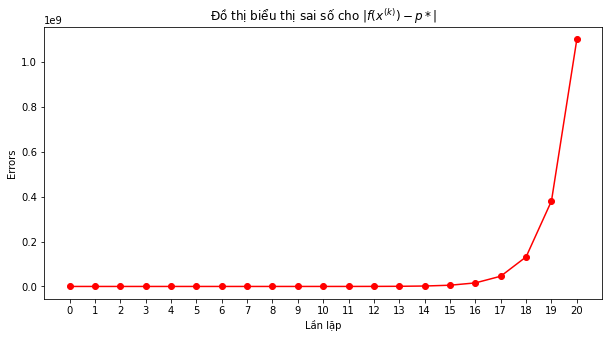

In [3]:
errors = [abs(f - p) for f in f_values]

plt.figure(figsize=(10, 5))
plt.title('Đồ thị biểu thị sai số cho $|f(x^{(k)}) - p*|$')
plt.plot(range(max_iter + 1), errors, c='r', marker='o')
plt.xticks(range(max_iter + 1))
plt.xlabel('Lần lặp')
plt.ylabel('Errors')
plt.show()

3. (2 điểm) Tìm learning rate theo phương pháp exact-line search trong thuật toán Gradient Descent của bài toán trên với điểm khởi tạo là $x^{(0)}=(0;1)$. Gọi điểm cập nhật trong trường hợp này là $x^{(k)}_{\text{exact}}$, vẽ đồ thị mô tả cho sai số $|f(x^{(k)}_{\text{exact}})-f(p^*)|$. 

In [4]:
from scipy.optimize import minimize_scalar

def exact_line_search(x, gradient):
    grad_func = lambda learning_rate: object_function(x - learning_rate * gradient)
    result = minimize_scalar(grad_func)
    return result.x

def gradient_descent_exact_line_search(max_iterations, init_x):
    x = init_x
    
    x_values = [x]
    f_values = [object_function(x)]
    for i in range(max_iterations):
        learning_rate = exact_line_search(x, gradient(x))
        x = x - learning_rate * gradient(x)
        x_values.append(x)
        f_values.append(object_function(x))
        print(f'Lần lặp thứ {i + 1}: x = {x_values[-1]} và f(x) = {f_values[-1]}')
    
    return x_values, f_values

x_values, f_values = gradient_descent_exact_line_search(max_iter, x0)

Lần lặp thứ 1: x = [1.00000000e+00 2.22044605e-16] và f(x) = -0.5
Lần lặp thứ 2: x = [ 0.50000001 -0.49999999] và f(x) = -1.0
Lần lặp thứ 3: x = [ 0.75 -0.75] và f(x) = -1.1250000000000004
Lần lặp thứ 4: x = [ 0.62499999 -0.87500001] và f(x) = -1.15625
Lần lặp thứ 5: x = [ 0.6875 -0.9375] và f(x) = -1.1640625000000002
Lần lặp thứ 6: x = [ 0.65625 -0.96875] và f(x) = -1.1660156250000002
Lần lặp thứ 7: x = [ 0.67187499 -0.98437499] và f(x) = -1.16650390625
Lần lặp thứ 8: x = [ 0.6640625 -0.9921875] và f(x) = -1.1666259765625004
Lần lặp thứ 9: x = [ 0.66796874 -0.99609374] và f(x) = -1.1666564941406252
Lần lặp thứ 10: x = [ 0.66601562 -0.99804688] và f(x) = -1.1666641235351567
Lần lặp thứ 11: x = [ 0.66699218 -0.99902343] và f(x) = -1.1666660308837893
Lần lặp thứ 12: x = [ 0.6665039  -0.99951172] và f(x) = -1.1666665077209477
Lần lặp thứ 13: x = [ 0.66674804 -0.99975585] và f(x) = -1.166666626930237
Lần lặp thứ 14: x = [ 0.66662597 -0.99987793] và f(x) = -1.1666666567325594
Lần lặp thứ 15

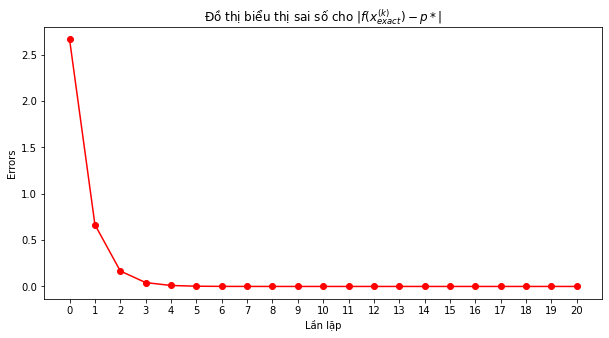

In [5]:
errors = [abs(f - p) for f in f_values]

plt.figure(figsize=(10, 5))
plt.title('Đồ thị biểu thị sai số cho $|f(x_{exact}^{(k)}) - p*|$')
plt.plot(range(max_iter + 1), errors, c='r', marker='o')
plt.xticks(range(max_iter + 1))
plt.xlabel('Lần lặp')
plt.ylabel('Errors')
plt.show()

### Câu 2. (4 điểm)
Bộ dữ liệu **Labeled Faces in the Wild (LFW)**: Bộ dữ liệu là tập hợp các bức ảnh JPEG của những người nổi tiếng được thu thập trên internet. Sử dụng lệnh sau để load bộ dữ liệu
```python
from sklearn.datasets import fetch_lfw_people
lfwPeople = fetch_lfw_people(data_home="./",min_faces_per_person=70, resize=0.4)
````
1. Hiển thị thông tin kích thước ảnh, số lượng ảnh, và số lượng nhãn (danh tính) trong bộ dữ liệu.
2. Chia dữ liệu thành 2 phần train/test (70/30) và chuẩn hóa dữ liệu
3. Xây dựng mô hình SVM sử dụng kernel ```sigmoid``` ({‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’})
4. Đánh giá mô hình: sử dụng accuracy, precision, recall, F1-score

<h2 style="text-align: center"> Bài làm </h2>

In [6]:
from sklearn.datasets import fetch_lfw_people
lfwPeople = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

1. Hiển thị thông tin kích thước ảnh, số lượng ảnh, và số lượng nhãn (danh tính) trong bộ dữ liệu.

In [7]:
n, h, w = lfwPeople.images.shape

print(f'Kích thước ảnh: {h}x{w}')
print('Số lượng ảnh:', n)
print('Số lượng nhãn:', len(lfwPeople.target_names))
print(f'Các nhãn trong bộ dữ liệu: {lfwPeople.target_names}')

Kích thước ảnh: 50x37
Số lượng ảnh: 1217
Số lượng nhãn: 6
Các nhãn trong bộ dữ liệu: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Tony Blair']


2. Chia dữ liệu thành 2 phần train/test (70/30) và chuẩn hóa dữ liệu

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = lfwPeople.data
y = lfwPeople.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

standardscaler = StandardScaler()
X_train_standard = standardscaler.fit_transform(X_train)
X_test_standard = standardscaler.transform(X_test)

3. Xây dựng mô hình SVM sử dụng kernel ```sigmoid``` ({‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’})

In [9]:
from sklearn.svm import SVC

model = SVC(kernel='sigmoid', random_state=42)
model.fit(X_train_standard, y_train)

SVC(kernel='sigmoid', random_state=42)

4. Đánh giá mô hình: sử dụng accuracy, precision, recall, F1-score

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test_standard)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
print('F1-score: ', f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.6666666666666666
Precision:  0.6572814059453339
Recall:  0.6666666666666666
F1-score:  0.6547511825751849


## --------------------------------------- Hết --------------------------------------

### Lưu ý: sinh viên không được sử dụng internet. Giám thị không giải thích gì thêm.